In [32]:
pip install networkx matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


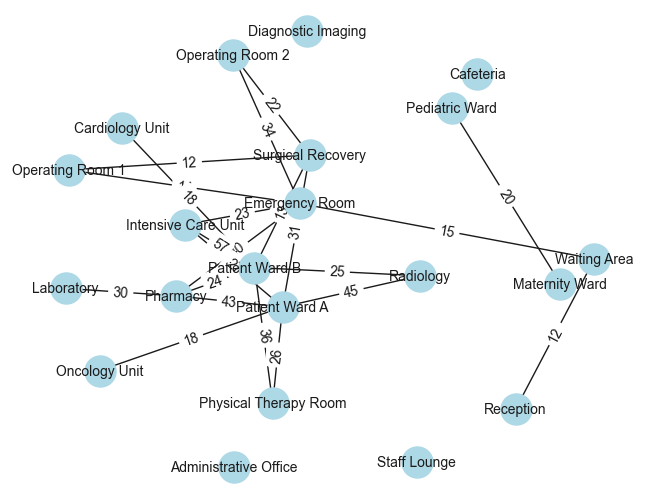

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()

# Add nodes and edges as before
nodes = [
    'Emergency Room', 'Intensive Care Unit', 'Operating Room 1', 'Operating Room 2',
    'Radiology', 'Pharmacy', 'Patient Ward A', 'Patient Ward B',
    'Surgical Recovery', 'Laboratory', 'Maternity Ward',
    'Pediatric Ward', 'Oncology Unit', 'Cardiology Unit',
    'Reception', 'Waiting Area', 'Cafeteria',
    'Administrative Office', 'Staff Lounge',
    'Physical Therapy Room', 'Diagnostic Imaging'
]
G.add_nodes_from(nodes)

edges_with_weights = [
    ('Reception', 'Waiting Area', 12),
    ('Waiting Area', 'Emergency Room', 15),
    ('Emergency Room', 'Intensive Care Unit', 23),
    ('Emergency Room', 'Operating Room 1', 14),
    ('Emergency Room', 'Operating Room 2', 34),
    ('Operating Room 1', 'Surgical Recovery', 12),
    ('Operating Room 2', 'Surgical Recovery', 22),
    ('Surgical Recovery', 'Patient Ward A', 31),
    ('Surgical Recovery', 'Patient Ward B', 13),
    ('Patient Ward A', 'Physical Therapy Room', 26),
    ('Patient Ward B', 'Physical Therapy Room', 36),
    ('Intensive Care Unit', 'Patient Ward A', 27),
    ('Intensive Care Unit', 'Patient Ward B', 57),
    ('Radiology', 'Patient Ward A', 45),
    ('Radiology', 'Patient Ward B', 25),
    ('Pharmacy', 'Emergency Room', 40),
    ('Pharmacy', 'Patient Ward A', 43),
    ('Pharmacy', 'Patient Ward B', 24),
    ('Laboratory', 'Pharmacy', 30),
    ('Maternity Ward', 'Pediatric Ward', 20),
    ('Oncology Unit', 'Patient Ward A', 18),
    ('Cardiology Unit', 'Patient Ward B', 18)
]
G.add_weighted_edges_from(edges_with_weights)

# Draw the graph with adjusted layout
pos = nx.spring_layout(G, k=9, iterations=150)  # Adjust k for spacing, more iterations for stability
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)

# Draw edges with weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


In [34]:
!pip install pygame


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Path: ['ER_F1', 'Ward A_F2', 'Reception_F3']


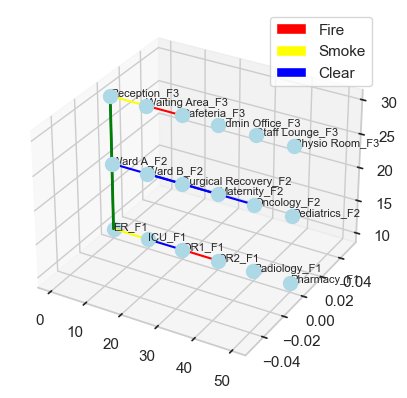

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import random
import tkinter as tk
from tkinter import simpledialog
from matplotlib.patches import Patch

# Initialize 3D graph
G = nx.Graph()
floor_count = 3  # Number of floors

nodes = {
    1: ['ER', 'ICU', 'OR1', 'OR2', 'Radiology', 'Pharmacy'],
    2: ['Ward A', 'Ward B', 'Surgical Recovery', 'Maternity', 'Oncology', 'Pediatrics'],
    3: ['Reception', 'Waiting Area', 'Cafeteria', 'Admin Office', 'Staff Lounge', 'Physio Room']
}

positions = {}
z_offset = 10
for floor, floor_nodes in nodes.items():
    for i, node in enumerate(floor_nodes):
        G.add_node(f"{node}_F{floor}")
        positions[f"{node}_F{floor}"] = (i * 10, 0, floor * z_offset)

edges_with_weights = [
    ('ER_F1', 'ICU_F1', 15),
    ('ICU_F1', 'OR1_F1', 25),
    ('OR1_F1', 'OR2_F1', 35),
    ('Ward A_F2', 'Maternity_F2', 10),
    ('Ward B_F2', 'Oncology_F2', 20),
    ('Reception_F3', 'Waiting Area_F3', 12),
    ('Waiting Area_F3', 'Cafeteria_F3', 15),
    ('ER_F1', 'Ward A_F2', 30),
    ('Ward A_F2', 'Reception_F3', 25)
]

G.add_weighted_edges_from(edges_with_weights)

# Mock sensor updates for fire/smoke
def mock_sensor_update():
    for edge in G.edges:
        hazard_level = random.random()
        if hazard_level < 0.2:  # Fire
            G.edges[edge]['hazard'] = 'fire'
            G.edges[edge]['weight'] *= 3  # Triple weight for fire
        elif hazard_level < 0.5:  # Smoke
            G.edges[edge]['hazard'] = 'smoke'
            G.edges[edge]['weight'] *= 1.5  # Increase weight for smoke
        else:  # Clear
            G.edges[edge]['hazard'] = 'clear'

# Visualize 3D graph with hazards
def visualize_3d(G, path=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    pos = positions
    color_map = {
        'fire': 'red',
        'smoke': 'yellow',
        'clear': 'blue'
    }

    # Draw nodes
    for node, (x, y, z) in pos.items():
        ax.scatter(x, y, z, color='lightblue', s=100)
        ax.text(x, y, z, node, fontsize=8)

    # Draw edges
    for edge in G.edges(data=True):
        x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
        y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
        z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
        color = color_map[edge[2].get('hazard', 'clear')]
        ax.plot(x_coords, y_coords, z_coords, color=color)

    # Highlight path
    if path:
        for i in range(len(path) - 1):
            x_coords = [pos[path[i]][0], pos[path[i + 1]][0]]
            y_coords = [pos[path[i]][1], pos[path[i + 1]][1]]
            z_coords = [pos[path[i]][2], pos[path[i + 1]][2]]
            ax.plot(x_coords, y_coords, z_coords, color='green', linewidth=2)

    legend_elements = [
        Patch(facecolor='red', label='Fire'),
        Patch(facecolor='yellow', label='Smoke'),
        Patch(facecolor='blue', label='Clear')
    ]
    ax.legend(handles=legend_elements)
    plt.show()

# GUI for user graph modification
def modify_graph():
    def block_node():
        node = simpledialog.askstring("Block Node", "Enter node to block:")
        if node in G.nodes:
            G.nodes[node]['status'] = 'blocked'
            print(f"Node '{node}' is now blocked.")

    def change_weight():
        edge = simpledialog.askstring("Change Edge Weight", "Enter edge (node1,node2):")
        weight = simpledialog.askinteger("New Weight", "Enter new weight:")
        node1, node2 = edge.split(",")
        if G.has_edge(node1, node2):
            G.edges[node1, node2]['weight'] = weight
            print(f"Edge weight between '{node1}' and '{node2}' set to {weight}.")

    root = tk.Tk()
    root.geometry("300x200")
    root.title("Graph Modification")

    tk.Button(root, text="Block Node", command=block_node).pack(pady=10)
    tk.Button(root, text="Change Edge Weight", command=change_weight).pack(pady=10)
    root.mainloop()

# Main function
def main():
    mock_sensor_update()  # Simulate hazards
    source = "ER_F1"
    target = "Reception_F3"
    path = nx.dijkstra_path(G, source, target, weight='weight')  # Example traversal
    print(f"Path: {path}")
    visualize_3d(G, path)  # Display graph with hazards and path
    modify_graph()  # Allow user to interactively modify graph

main()


In [36]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import random
from PyQt5 import QtWidgets
from PyQt5.QtWidgets import QDialog, QVBoxLayout, QPushButton, QInputDialog, QApplication
from matplotlib.patches import Patch

# Initialize 3D graph
G = nx.Graph()
floor_count = 3  # Number of floors

nodes = {
    1: ['ER', 'ICU', 'OR1', 'OR2', 'Radiology', 'Pharmacy'],
    2: ['Ward A', 'Ward B', 'Surgical Recovery', 'Maternity', 'Oncology', 'Pediatrics'],
    3: ['Reception', 'Waiting Area', 'Cafeteria', 'Admin Office', 'Staff Lounge', 'Physio Room']
}

positions = {}
z_offset = 10
for floor, floor_nodes in nodes.items():
    for i, node in enumerate(floor_nodes):
        G.add_node(f"{node}_F{floor}")
        positions[f"{node}_F{floor}"] = (i * 10, 0, floor * z_offset)

edges_with_weights = [
    ('ER_F1', 'ICU_F1', 15),
    ('ICU_F1', 'OR1_F1', 25),
    ('OR1_F1', 'OR2_F1', 35),
    ('Ward A_F2', 'Maternity_F2', 10),
    ('Ward B_F2', 'Oncology_F2', 20),
    ('Reception_F3', 'Waiting Area_F3', 12),
    ('Waiting Area_F3', 'Cafeteria_F3', 15),
    ('ER_F1', 'Ward A_F2', 30),
    ('Ward A_F2', 'Reception_F3', 25)
]

G.add_weighted_edges_from(edges_with_weights)

# Mock sensor updates for fire/smoke
def mock_sensor_update():
    for edge in G.edges:
        hazard_level = random.random()
        if hazard_level < 0.2:  # Fire
            G.edges[edge]['hazard'] = 'fire'
            G.edges[edge]['weight'] *= 3  # Triple weight for fire
        elif hazard_level < 0.5:  # Smoke
            G.edges[edge]['hazard'] = 'smoke'
            G.edges[edge]['weight'] *= 1.5  # Increase weight for smoke
        else:  # Clear
            G.edges[edge]['hazard'] = 'clear'

# Visualize 3D graph with hazards
def visualize_3d(G, path=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    pos = positions
    color_map = {
        'fire': 'red',
        'smoke': 'yellow',
        'clear': 'blue'
    }

    # Draw nodes
    for node, (x, y, z) in pos.items():
        ax.scatter(x, y, z, color='lightblue', s=100)
        ax.text(x, y, z, node, fontsize=8)

    # Draw edges
    for edge in G.edges(data=True):
        x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
        y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
        z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
        color = color_map[edge[2].get('hazard', 'clear')]
        ax.plot(x_coords, y_coords, z_coords, color=color)

    # Highlight path
    if path:
        for i in range(len(path) - 1):
            x_coords = [pos[path[i]][0], pos[path[i + 1]][0]]
            y_coords = [pos[path[i]][1], pos[path[i + 1]][1]]
            z_coords = [pos[path[i]][2], pos[path[i + 1]][2]]
            ax.plot(x_coords, y_coords, z_coords, color='green', linewidth=2)

    legend_elements = [
        Patch(facecolor='red', label='Fire'),
        Patch(facecolor='yellow', label='Smoke'),
        Patch(facecolor='blue', label='Clear')
    ]
    ax.legend(handles=legend_elements)
    plt.show()

# GUI for user graph modification
class GraphModificationApp(QDialog):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setWindowTitle('Graph Modification')
        self.setGeometry(100, 100, 400, 200)
        layout = QVBoxLayout()

        block_button = QPushButton('Block Node')
        block_button.clicked.connect(self.block_node)
        layout.addWidget(block_button)

        weight_button = QPushButton('Change Edge Weight')
        weight_button.clicked.connect(self.change_weight)
        layout.addWidget(weight_button)

        self.setLayout(layout)

    def block_node(self):
        node, ok = QInputDialog.getText(self, 'Block Node', 'Enter node to block:')
        if ok and node in G.nodes:
            G.nodes[node]['status'] = 'blocked'
            print(f"Node '{node}' is now blocked.")

    def change_weight(self):
        edge, ok = QInputDialog.getText(self, 'Change Edge Weight', 'Enter edge (node1,node2):')
        if ok:
            weight, ok = QInputDialog.getInt(self, 'New Weight', 'Enter new weight:')
            if ok:
                node1, node2 = edge.split(',')
                if G.has_edge(node1, node2):
                    G.edges[node1, node2]['weight'] = weight
                    print(f"Edge weight between '{node1}' and '{node2}' set to {weight}.")

# Main function
def main():
    mock_sensor_update()  # Simulate hazards
    source = "ER_F1"
    target = "Reception_F3"
    path = nx.dijkstra_path(G, source, target, weight='weight')  # Example traversal
    print(f"Path: {path}")
    visualize_3d(G, path)  # Display graph with hazards and path
    
    app = QApplication(sys.argv)
    ex = GraphModificationApp()
    ex.exec_()

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'PyQt5'

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tkinter as tk
from tkinter import simpledialog
import random
import threading
import time


# Initialize the graph
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
positions = {node: (random.randint(0, 10), random.randint(0, 10), random.randint(1, 3)) for node in nodes}

for node in nodes:
    G.add_node(node, status="clear")

edges = [
    ('A', 'B', 10),
    ('B', 'C', 15),
    ('C', 'D', 10),
    ('D', 'E', 20),
    ('E', 'F', 25),
    ('A', 'F', 50)
]
G.add_weighted_edges_from(edges)


# Function to mock hazard updates and track causes
def update_graph(graph):
    print("\n--- Updating Graph ---")
    for node in graph.nodes:
        if random.random() < 0.2:  # 20% chance to block
            graph.nodes[node]["status"] = "blocked"
            print(f"Node '{node}' is now blocked.")
        else:
            graph.nodes[node]["status"] = "clear"

    for edge in graph.edges:
        new_weight = graph.edges[edge]["weight"] + random.randint(-5, 5)
        graph.edges[edge]["weight"] = max(1, new_weight)
        print(f"Weight of edge {edge} updated to {new_weight}.")


# Algorithms
def dijkstra(graph, source, target):
    try:
        return nx.dijkstra_path(graph, source, target, weight='weight')
    except nx.NetworkXNoPath:
        return "No path found"


def a_star(graph, source, target):
    try:
        return nx.astar_path(graph, source, target, heuristic=lambda u, v: 1, weight='weight')
    except nx.NetworkXNoPath:
        return "No path found"


def visualize_2d(graph, path, algorithm_name):
    pos_2d = {node: (x, y) for node, (x, y, _) in positions.items()}
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos_2d, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700)

    # Highlight path
    if path != "No path found":
        path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(graph, pos_2d, edgelist=path_edges, edge_color='green', width=2)
    plt.title(f"{algorithm_name} Traversal")
    plt.show()


# GUI
def run_gui():
    def handle_input():
        source = source_entry.get()
        target = target_entry.get()

        # Update graph to show dynamic hazards
        update_graph(G)

        paths = {
            "Dijkstra": dijkstra(G, source, target),
            "A*": a_star(G, source, target)
        }

        # Display each algorithm's traversal
        for algo, path in paths.items():
            visualize_2d(G, path, algo)

        display_results(paths)

    def display_results(paths):
        result_text.delete(1.0, tk.END)
        for algo, path in paths.items():
            result_text.insert(tk.END, f"{algo}: {path}\n")

    root = tk.Tk()
    root.title("Path Optimization GUI")

    tk.Label(root, text="Source:").grid(row=0, column=0)
    source_entry = tk.Entry(root)
    source_entry.grid(row=0, column=1)

    tk.Label(root, text="Target:").grid(row=1, column=0)
    target_entry = tk.Entry(root)
    target_entry.grid(row=1, column=1)

    tk.Button(root, text="Find Path", command=handle_input).grid(row=2, column=0, columnspan=2)
    result_text = tk.Text(root, height=10, width=50)
    result_text.grid(row=3, column=0, columnspan=2)

    root.mainloop()


# Run the GUI
if __name__ == "__main__":
    run_gui()


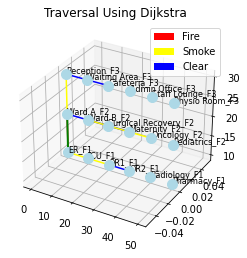

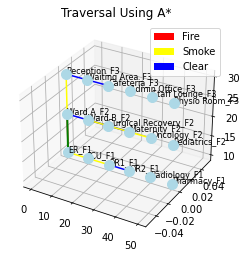

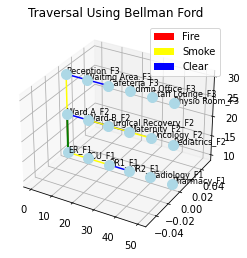

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import tkinter as tk
from tkinter import simpledialog
from matplotlib.patches import Patch
import random
import threading

# Initialize 3D graph
G = nx.Graph()
floor_count = 3  # Number of floors

nodes = {
    1: ['ER', 'ICU', 'OR1', 'OR2', 'Radiology', 'Pharmacy'],
    2: ['Ward A', 'Ward B', 'Surgical Recovery', 'Maternity', 'Oncology', 'Pediatrics'],
    3: ['Reception', 'Waiting Area', 'Cafeteria', 'Admin Office', 'Staff Lounge', 'Physio Room']
}

positions = {}
z_offset = 10
for floor, floor_nodes in nodes.items():
    for i, node in enumerate(floor_nodes):
        G.add_node(f"{node}_F{floor}")
        positions[f"{node}_F{floor}"] = (i * 10, 0, floor * z_offset)

edges_with_weights = [
    ('ER_F1', 'ICU_F1', 15),
    ('ICU_F1', 'OR1_F1', 25),
    ('OR1_F1', 'OR2_F1', 35),
    ('Ward A_F2', 'Maternity_F2', 10),
    ('Ward B_F2', 'Oncology_F2', 20),
    ('Reception_F3', 'Waiting Area_F3', 12),
    ('Waiting Area_F3', 'Cafeteria_F3', 15),
    ('ER_F1', 'Ward A_F2', 30),
    ('Ward A_F2', 'Reception_F3', 25)
]

G.add_weighted_edges_from(edges_with_weights)

# Mock sensor updates for fire/smoke
def mock_sensor_update():
    for edge in G.edges:
        hazard_level = random.random()
        if hazard_level < 0.2:  # Fire
            G.edges[edge]['hazard'] = 'fire'
            G.edges[edge]['weight'] *= 3  # Triple weight for fire
        elif hazard_level < 0.5:  # Smoke
            G.edges[edge]['hazard'] = 'smoke'
            G.edges[edge]['weight'] *= 1.5  # Increase weight for smoke
        else:  # Clear
            G.edges[edge]['hazard'] = 'clear'

# Run Dijkstra's algorithm
def dijkstra(graph, source, target):
    try:
        return nx.dijkstra_path(graph, source, target, weight='weight')
    except nx.NetworkXNoPath:
        return "No path found"

# Run A* algorithm
def a_star(graph, source, target):
    try:
        return nx.astar_path(graph, source, target, heuristic=lambda u, v: 1, weight='weight')
    except nx.NetworkXNoPath:
        return "No path found"

# Run Bellman-Ford algorithm
def bellman_ford(graph, source, target):
    try:
        lengths, paths = nx.single_source_bellman_ford(graph, source, weight='weight')
        return paths.get(target, "No path found")
    except nx.NetworkXUnbounded:
        return "Negative weight cycle detected"

# Visualize 3D graph with path animation
def visualize_3d(G, path=None, algorithm_name=""):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    pos = positions
    color_map = {'fire': 'red', 'smoke': 'yellow', 'clear': 'blue'}

    # Draw nodes
    for node, (x, y, z) in pos.items():
        ax.scatter(x, y, z, color='lightblue', s=100)
        ax.text(x, y, z, node, fontsize=8)

    # Draw edges
    for edge in G.edges(data=True):
        x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
        y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
        z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
        color = color_map[edge[2].get('hazard', 'clear')]
        ax.plot(x_coords, y_coords, z_coords, color=color)

    # Highlight path
    if path:
        for i in range(len(path) - 1):
            x_coords = [pos[path[i]][0], pos[path[i + 1]][0]]
            y_coords = [pos[path[i]][1], pos[path[i + 1]][1]]
            z_coords = [pos[path[i]][2], pos[path[i + 1]][2]]
            ax.plot(x_coords, y_coords, z_coords, color='green', linewidth=2)

    legend_elements = [
        Patch(facecolor='red', label='Fire'),
        Patch(facecolor='yellow', label='Smoke'),
        Patch(facecolor='blue', label='Clear')
    ]
    ax.legend(handles=legend_elements)
    plt.title(f"Traversal Using {algorithm_name}")
    plt.show()

# GUI for user inputs
def run_gui():
    def handle_input():
        source = source_entry.get()
        target = target_entry.get()
        paths = {
            "Dijkstra": dijkstra(G, source, target),
            "A*": a_star(G, source, target),
            "Bellman-Ford": bellman_ford(G, source, target),
        }
        display_results(paths)

    def display_results(paths):
        result_text.delete(1.0, tk.END)
        for algo, path in paths.items():
            result_text.insert(tk.END, f"{algo}: {path}\n")
        # Optional: Visualize the selected path
        visualize_3d(G, paths["Dijkstra"],"Dijkstra")
        visualize_3d(G, paths["A*"],"A*")
        visualize_3d(G, paths["Bellman-Ford"],"Bellman Ford")

    root = tk.Tk()
    root.title("Path Optimization GUI")

    tk.Label(root, text="Source:").grid(row=0, column=0)
    source_entry = tk.Entry(root)
    source_entry.grid(row=0, column=1)

    tk.Label(root, text="Destination:").grid(row=1, column=0)
    target_entry = tk.Entry(root)
    target_entry.grid(row=1, column=1)

    tk.Button(root, text="Find Path", command=handle_input).grid(row=2, column=0, columnspan=2)
    result_text = tk.Text(root, height=10, width=50)
    result_text.grid(row=3, column=0, columnspan=2)

    root.mainloop()

if __name__ == "__main__":
    threading.Thread(target=mock_sensor_update, daemon=True).start()
    run_gui()


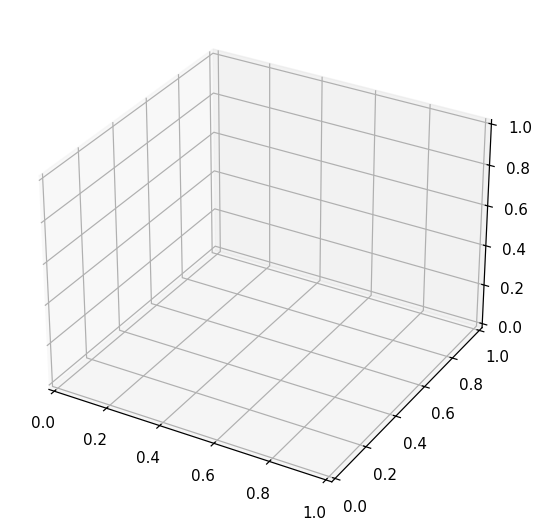

In [ ]:
#runs only one thing no differentiation in algos
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch
import random
import time
import threading
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Graph initialization (same as before)
G = nx.Graph()
floor_count = 3  # Number of floors

nodes = {
    1: ['ER', 'ICU', 'OR1', 'OR2', 'Radiology', 'Pharmacy'],
    2: ['Ward A', 'Ward B', 'Surgical Recovery', 'Maternity', 'Oncology', 'Pediatrics'],
    3: ['Reception', 'Waiting Area', 'Cafeteria', 'Admin Office', 'Staff Lounge', 'Physio Room']
}

positions = {}
z_offset = 10
for floor, floor_nodes in nodes.items():
    for i, node in enumerate(floor_nodes):
        G.add_node(f"{node}_F{floor}")
        positions[f"{node}_F{floor}"] = (i * 10, 0, floor * z_offset)

edges_with_weights = [
    ('ER_F1', 'ICU_F1', 15),
    ('ICU_F1', 'OR1_F1', 25),
    ('OR1_F1', 'OR2_F1', 35),
    ('Ward A_F2', 'Maternity_F2', 10),
    ('Ward B_F2', 'Oncology_F2', 20),
    ('Reception_F3', 'Waiting Area_F3', 12),
    ('Waiting Area_F3', 'Cafeteria_F3', 15),
    ('ER_F1', 'Ward A_F2', 30),
    ('Ward A_F2', 'Reception_F3', 25)
]

G.add_weighted_edges_from(edges_with_weights)

# Hazard Update Function
def mock_sensor_update(graph):
    for edge in graph.edges:
        hazard_level = random.random()
        if hazard_level < 0.2:  # Fire
            graph.edges[edge]['hazard'] = 'fire'
            graph.edges[edge]['weight'] *= 3  # Triple weight for fire
        elif hazard_level < 0.5:  # Smoke
            graph.edges[edge]['hazard'] = 'smoke'
            graph.edges[edge]['weight'] *= 1.5  # Increase weight for smoke
        else:  # Clear
            graph.edges[edge]['hazard'] = 'clear'

# Visualization Function
def visualize_3d_on_canvas(canvas, ax, graph, positions, path=None):
    ax.clear()
    color_map = {'fire': 'red', 'smoke': 'yellow', 'clear': 'blue'}
    # Draw nodes
    for node, (x, y, z) in positions.items():
        ax.scatter(x, y, z, color='lightblue', s=100)
        ax.text(x, y, z, node, fontsize=8)

    # Draw edges
    for edge in graph.edges(data=True):
        x_coords = [positions[edge[0]][0], positions[edge[1]][0]]
        y_coords = [positions[edge[0]][1], positions[edge[1]][1]]
        z_coords = [positions[edge[0]][2], positions[edge[1]][2]]
        color = color_map[edge[2].get('hazard', 'clear')]
        ax.plot(x_coords, y_coords, z_coords, color=color)

    # Highlight path
    if path:
        for i in range(len(path) - 1):
            x_coords = [positions[path[i]][0], positions[path[i + 1]][0]]
            y_coords = [positions[path[i]][1], positions[path[i + 1]][1]]
            z_coords = [positions[path[i]][2], positions[path[i + 1]][2]]
            ax.plot(x_coords, y_coords, z_coords, color='green', linewidth=2)
    legend_elements = [
        Patch(facecolor='red', label='Fire'),
        Patch(facecolor='yellow', label='Smoke'),
        Patch(facecolor='blue', label='Clear')
    ]

    canvas.draw()

# Path Calculation and GUI Update Loop
def update_paths(graph, source, target, canvas, ax, result_text):
    while True:
        mock_sensor_update(graph)

        try:
            d_path = nx.dijkstra_path(graph, source, target, weight='weight')
        except nx.NetworkXNoPath:
            d_path = "No path found"

        try:
            a_path = nx.astar_path(graph, source, target, heuristic=lambda u, v: 1, weight='weight')
        except nx.NetworkXNoPath:
            a_path = "No path found"

        # Update Results
        result_text.delete(1.0, tk.END)
        result_text.insert(tk.END, f"Dijkstra's Path: {d_path}\n")
        result_text.insert(tk.END, f"A* Path: {a_path}\n")

        # Visualize updated graph and path
        visualize_3d_on_canvas(canvas, ax, graph, positions, path=d_path)

        time.sleep(5)  # Update every 5 seconds

# GUI Setup
def run_gui():
    root = tk.Tk()
    root.title("Dynamic Path Optimization in Hospital")

    # Input Fields
    tk.Label(root, text="Source:").grid(row=0, column=0)
    source_entry = tk.Entry(root)
    source_entry.grid(row=0, column=1)

    tk.Label(root, text="Destination:").grid(row=1, column=0)
    target_entry = tk.Entry(root)
    target_entry.grid(row=1, column=1)

    # Result Display
    result_text = tk.Text(root, height=10, width=50)
    result_text.grid(row=2, column=0, columnspan=2)

    # 3D Visualization Area
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().grid(row=3, column=0, columnspan=2)

    # Start Dynamic Updates
    def start_simulation():
        source = source_entry.get()
        target = target_entry.get()
        threading.Thread(target=update_paths, args=(G, source, target, canvas, ax, result_text), daemon=True).start()

    tk.Button(root, text="Start Simulation", command=start_simulation).grid(row=4, column=0, columnspan=2)

    root.mainloop()

if __name__ == "__main__":
    run_gui()


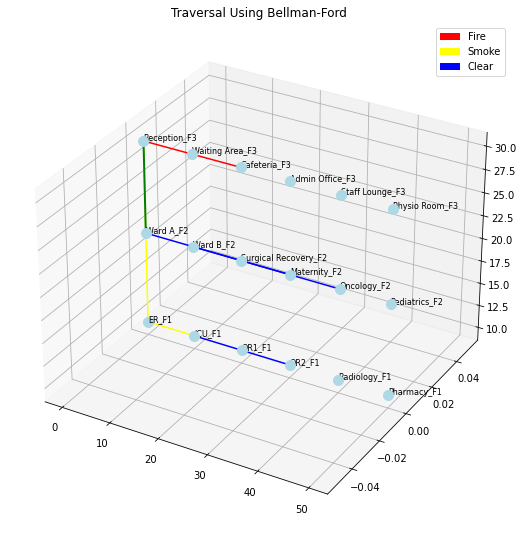

In [ ]:
#runs for bellman and on front end
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import random
import threading
import time

# Initialize 3D graph
G = nx.Graph()
floor_count = 3  # Number of floors

nodes = {
    1: ['ER', 'ICU', 'OR1', 'OR2', 'Radiology', 'Pharmacy'],
    2: ['Ward A', 'Ward B', 'Surgical Recovery', 'Maternity', 'Oncology', 'Pediatrics'],
    3: ['Reception', 'Waiting Area', 'Cafeteria', 'Admin Office', 'Staff Lounge', 'Physio Room']
}

positions = {}
z_offset = 10
for floor, floor_nodes in nodes.items():
    for i, node in enumerate(floor_nodes):
        G.add_node(f"{node}_F{floor}")
        positions[f"{node}_F{floor}"] = (i * 10, 0, floor * z_offset)

edges_with_weights = [
    ('ER_F1', 'ICU_F1', 15),
    ('ICU_F1', 'OR1_F1', 25),
    ('OR1_F1', 'OR2_F1', 35),
    ('Ward A_F2', 'Maternity_F2', 10),
    ('Ward B_F2', 'Oncology_F2', 20),
    ('Reception_F3', 'Waiting Area_F3', 12),
    ('Waiting Area_F3', 'Cafeteria_F3', 15),
    ('ER_F1', 'Ward A_F2', 30),
    ('Ward A_F2', 'Reception_F3', 25)
]

G.add_weighted_edges_from(edges_with_weights)

# Mock sensor updates for fire/smoke
def mock_sensor_update():
    while True:
        for edge in G.edges:
            hazard_level = random.random()
            if hazard_level < 0.2:  # Fire
                G.edges[edge]['hazard'] = 'fire'
                G.edges[edge]['weight'] *= 3  # Triple weight for fire
            elif hazard_level < 0.5:  # Smoke
                G.edges[edge]['hazard'] = 'smoke'
                G.edges[edge]['weight'] *= 1.5  # Increase weight for smoke
            else:  # Clear
                G.edges[edge]['hazard'] = 'clear'
        time.sleep(5)

# Pathfinding algorithms
def dijkstra(graph, source, target):
    try:
        return nx.dijkstra_path(graph, source, target, weight='weight')
    except nx.NetworkXNoPath:
        return None

def a_star(graph, source, target):
    try:
        return nx.astar_path(graph, source, target, heuristic=lambda u, v: 1, weight='weight')
    except nx.NetworkXNoPath:
        return None

def bellman_ford(graph, source, target):
    try:
        lengths, paths = nx.single_source_bellman_ford(graph, source, weight='weight')
        return paths.get(target, None)
    except nx.NetworkXUnbounded:
        return None

# Visualize 3D graph
def visualize_3d(canvas, ax, graph, path=None, algorithm_name=""):
    ax.clear()
    pos = positions
    color_map = {'fire': 'red', 'smoke': 'yellow', 'clear': 'blue'}

    # Draw nodes
    for node, (x, y, z) in pos.items():
        ax.scatter(x, y, z, color='lightblue', s=100)
        ax.text(x, y, z, node, fontsize=8)

    # Draw edges
    for edge in graph.edges(data=True):
        x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
        y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
        z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
        color = color_map[edge[2].get('hazard', 'clear')]
        ax.plot(x_coords, y_coords, z_coords, color=color)

    # Highlight path
    if path:
        for i in range(len(path) - 1):
            x_coords = [pos[path[i]][0], pos[path[i + 1]][0]]
            y_coords = [pos[path[i]][1], pos[path[i + 1]][1]]
            z_coords = [pos[path[i]][2], pos[path[i + 1]][2]]
            ax.plot(x_coords, y_coords, z_coords, color='green', linewidth=2)

    legend_elements = [
        Patch(facecolor='red', label='Fire'),
        Patch(facecolor='yellow', label='Smoke'),
        Patch(facecolor='blue', label='Clear')
    ]
    ax.legend(handles=legend_elements)
    ax.set_title(f"Traversal Using {algorithm_name}")
    canvas.draw()

# GUI for visualization
def run_gui():
    root = tk.Tk()
    root.title("Emergency Path Optimization")
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

    def handle_input():
        source = source_entry.get()
        target = target_entry.get()
        if not source or not target:
            result_label.config(text="Please enter valid source and destination nodes.")
            return
        
        algorithms = {
            "Dijkstra": dijkstra(G, source, target),
            "A*": a_star(G, source, target),
            "Bellman-Ford": bellman_ford(G, source, target),
        }
        
        for algo, path in algorithms.items():
            if path:
                visualize_3d(canvas, ax, G, path, algorithm_name=algo)
                time.sleep(1)  # Pause to allow the user to see each path
            else:
                result_label.config(text=f"No path found using {algo}.")

    tk.Label(root, text="Source:").pack()
    source_entry = tk.Entry(root)
    source_entry.pack()

    tk.Label(root, text="Destination:").pack()
    target_entry = tk.Entry(root)
    target_entry.pack()

    tk.Button(root, text="Find Path", command=handle_input).pack()
    result_label = tk.Label(root, text="")
    result_label.pack()

    threading.Thread(target=mock_sensor_update, daemon=True).start()
    root.mainloop()

if __name__ == "__main__":
    run_gui()


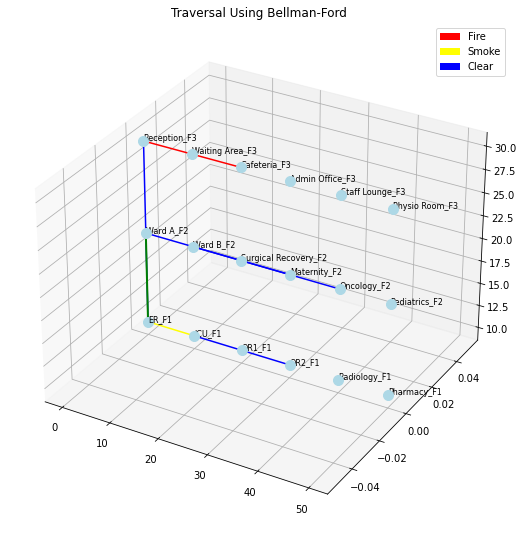

In [ ]:
#trying to run all algos parallely (NO update graph periodic)
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import random
import threading
import time

# Initialize 3D graph
G = nx.Graph()
floor_count = 3  # Number of floors

nodes = {
    1: ['ER', 'ICU', 'OR1', 'OR2', 'Radiology', 'Pharmacy'],
    2: ['Ward A', 'Ward B', 'Surgical Recovery', 'Maternity', 'Oncology', 'Pediatrics'],
    3: ['Reception', 'Waiting Area', 'Cafeteria', 'Admin Office', 'Staff Lounge', 'Physio Room']
}

positions = {}
z_offset = 10
for floor, floor_nodes in nodes.items():
    for i, node in enumerate(floor_nodes):
        G.add_node(f"{node}_F{floor}")
        positions[f"{node}_F{floor}"] = (i * 10, 0, floor * z_offset)

edges_with_weights = [
    ('ER_F1', 'ICU_F1', 15),
    ('ICU_F1', 'OR1_F1', 25),
    ('OR1_F1', 'OR2_F1', 35),
    ('Ward A_F2', 'Maternity_F2', 10),
    ('Ward B_F2', 'Oncology_F2', 20),
    ('Reception_F3', 'Waiting Area_F3', 12),
    ('Waiting Area_F3', 'Cafeteria_F3', 15),
    ('ER_F1', 'Ward A_F2', 30),
    ('Ward A_F2', 'Reception_F3', 25)
]

G.add_weighted_edges_from(edges_with_weights)

# Mock sensor updates for fire/smoke
def mock_sensor_update():
    while True:
        for edge in G.edges:
            hazard_level = random.random()
            if hazard_level < 0.2:  # Fire
                G.edges[edge]['hazard'] = 'fire'
                G.edges[edge]['weight'] *= 3  # Triple weight for fire
            elif hazard_level < 0.5:  # Smoke
                G.edges[edge]['hazard'] = 'smoke'
                G.edges[edge]['weight'] *= 1.5  # Increase weight for smoke
            else:  # Clear
                G.edges[edge]['hazard'] = 'clear'
        time.sleep(5)

# Pathfinding algorithms
def dijkstra(graph, source, target, result_dict):
    try:
        result_dict['Dijkstra'] = nx.dijkstra_path(graph, source, target, weight='weight')
    except nx.NetworkXNoPath:
        result_dict['Dijkstra'] = None

def a_star(graph, source, target, result_dict):
    try:
        result_dict['A*'] = nx.astar_path(graph, source, target, heuristic=lambda u, v: 1, weight='weight')
    except nx.NetworkXNoPath:
        result_dict['A*'] = None

def bellman_ford(graph, source, target, result_dict):
    try:
        lengths, paths = nx.single_source_bellman_ford(graph, source, weight='weight')
        result_dict['Bellman-Ford'] = paths.get(target, None)
    except nx.NetworkXUnbounded:
        result_dict['Bellman-Ford'] = None

# Visualize 3D graph
def visualize_3d(canvas, ax, graph, path=None, algorithm_name=""):
    ax.clear()
    pos = positions
    color_map = {'fire': 'red', 'smoke': 'yellow', 'clear': 'blue'}

    # Draw nodes
    for node, (x, y, z) in pos.items():
        ax.scatter(x, y, z, color='lightblue', s=100)
        ax.text(x, y, z, node, fontsize=8)

    # Draw edges
    for edge in graph.edges(data=True):
        x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
        y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
        z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
        color = color_map[edge[2].get('hazard', 'clear')]
        ax.plot(x_coords, y_coords, z_coords, color=color)

    # Highlight path
    if path:
        for i in range(len(path) - 1):
            x_coords = [pos[path[i]][0], pos[path[i + 1]][0]]
            y_coords = [pos[path[i]][1], pos[path[i + 1]][1]]
            z_coords = [pos[path[i]][2], pos[path[i + 1]][2]]
            ax.plot(x_coords, y_coords, z_coords, color='green', linewidth=2)

    legend_elements = [
        Patch(facecolor='red', label='Fire'),
        Patch(facecolor='yellow', label='Smoke'),
        Patch(facecolor='blue', label='Clear')
    ]
    ax.legend(handles=legend_elements)
    ax.set_title(f"Traversal Using {algorithm_name}")
    canvas.draw()

# GUI for visualization
def run_gui():
    root = tk.Tk()
    root.title("Emergency Path Optimization")
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

    def handle_input():
        source = source_entry.get()
        target = target_entry.get()
        if not source or not target:
            result_label.config(text="Please enter valid source and destination nodes.")
            return
        
        result_dict = {}

        # Run algorithms in parallel using threads
        threads = [
            threading.Thread(target=dijkstra, args=(G, source, target, result_dict)),
            threading.Thread(target=a_star, args=(G, source, target, result_dict)),
            threading.Thread(target=bellman_ford, args=(G, source, target, result_dict))
        ]

        for t in threads:
            t.start()

        for t in threads:
            t.join()

        # Visualize paths for all algorithms
        for algo, path in result_dict.items():
            if path:
                visualize_3d(canvas, ax, G, path, algorithm_name=algo)
            else:
                result_label.config(text=f"No path found using {algo}.")

    tk.Label(root, text="Source:").pack()
    source_entry = tk.Entry(root)
    source_entry.pack()

    tk.Label(root, text="Destination:").pack()
    target_entry = tk.Entry(root)
    target_entry.pack()

    tk.Button(root, text="Find Path", command=handle_input).pack()
    result_label = tk.Label(root, text="")
    result_label.pack()

    threading.Thread(target=mock_sensor_update, daemon=True).start()
    root.mainloop()

if __name__ == "__main__":
    run_gui()


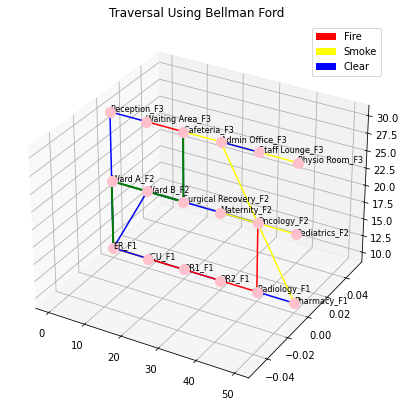

Exception in thread Thread-93:
Traceback (most recent call last):
  File "c:\Users\sampa\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "c:\Users\sampa\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\sampa\AppData\Local\Temp/ipykernel_18500/4064030327.py", line 96, in update_paths
  File "c:\Users\sampa\anaconda3\lib\tkinter\__init__.py", line 3602, in delete
    self.tk.call(self._w, 'delete', index1, index2)
RuntimeError: main thread is not in main loop


In [ ]:
#new graph with mock sensor runnning in periodic mock sensor (but somethings wrong in the logic)
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import random
import threading
import time

# Initialize 3D graph
G = nx.Graph()
floor_count = 3  # Number of floors

nodes = {
    1: ['ER', 'ICU', 'OR1', 'OR2', 'Radiology', 'Pharmacy'],
    2: ['Ward A', 'Ward B', 'Surgical Recovery', 'Maternity', 'Oncology', 'Pediatrics'],
    3: ['Reception', 'Waiting Area', 'Cafeteria', 'Admin Office', 'Staff Lounge', 'Physio Room']
}

positions = {}
z_offset = 10
for floor, floor_nodes in nodes.items():
    for i, node in enumerate(floor_nodes):
        G.add_node(f"{node}_F{floor}")
        positions[f"{node}_F{floor}"] = (i * 10, 0, floor * z_offset)

edges_with_weights = [
    # Floor 1 connections
    ('ER_F1', 'ICU_F1', 10),
    ('ER_F1', 'OR1_F1', 15),
    ('ER_F1', 'OR2_F1', 20),
    ('ICU_F1', 'Radiology_F1', 15),
    ('Radiology_F1', 'Pharmacy_F1', 10),
    
    # Floor 2 connections
    ('Ward A_F2', 'Ward B_F2', 10),
    ('Ward A_F2', 'Surgical Recovery_F2', 15),
    ('Ward B_F2', 'Oncology_F2', 10),
    ('Maternity_F2', 'Pediatrics_F2', 10),
    
    # Floor 3 connections
    ('Reception_F3', 'Waiting Area_F3', 10),
    ('Waiting Area_F3', 'Cafeteria_F3', 15),
    ('Admin Office_F3', 'Staff Lounge_F3', 10),
    ('Cafeteria_F3', 'Physio Room_F3', 15),
    
    # Inter-floor connections
    ('ER_F1', 'Ward A_F2', 20),
    ('ER_F1', 'Ward B_F2', 25),
    ('ER_F1', 'Reception_F3', 30),
    ('Radiology_F1', 'Oncology_F2', 20),
    ('Pharmacy_F1', 'Admin Office_F3', 25),
    ('Surgical Recovery_F2', 'Cafeteria_F3', 30)
]

# Add edges to the graph
G.add_weighted_edges_from(edges_with_weights)

# Mock sensor updates for fire/smoke
def mock_sensor_update(graph):
    for edge in graph.edges:
        hazard_level = random.random()
        if hazard_level < 0.2:  # Fire
            graph.edges[edge]['hazard'] = 'fire'
            graph.edges[edge]['weight'] *= 3  # Triple weight for fire
        elif hazard_level < 0.5:  # Smoke
            graph.edges[edge]['hazard'] = 'smoke'
            graph.edges[edge]['weight'] *= 2  # Increase weight for smoke
        else:  # Clear
            graph.edges[edge]['hazard'] = 'clear'

# Path Calculation and GUI Update Loop
def update_paths(graph, source, target, canvas, ax, result_text):
    while True:
        mock_sensor_update(graph)

        try:
            d_path = nx.dijkstra_path(graph, source, target, weight='weight')
        except nx.NetworkXNoPath:
            d_path = "No path found"

        try:
            a_path = nx.astar_path(graph, source, target, heuristic=lambda u, v: 1, weight='weight')
        except nx.NetworkXNoPath:
            a_path = "No path found"

        try:
            bf_lengths, bf_paths = nx.single_source_bellman_ford(graph, source, weight='weight')
            bf_path = bf_paths.get(target, "No path found")
        except nx.NetworkXNoPath:
            bf_path = "No path found"

        # Update Results
        result_text.delete(1.0, tk.END)
        result_text.insert(tk.END, f"Dijkstra's Path: {d_path}\n")
        result_text.insert(tk.END, f"A* Path: {a_path}\n")
        result_text.insert(tk.END, f"Bellman-Ford Path: {bf_path}\n")

        # Visualize updated graph and path
        visualize_3d(canvas, ax, graph, path=d_path, algorithm_name="Dijkstra")
        time.sleep(4)
        visualize_3d(canvas, ax, graph, path=a_path, algorithm_name="A*")
        time.sleep(4)
        visualize_3d(canvas, ax, graph, path=bf_path, algorithm_name="Bellman Ford")
        time.sleep(4)
        time.sleep(5)  # Update every 5 seconds

# Visualize 3D graph
def visualize_3d(canvas, ax, graph, path=None, algorithm_name=""):
    ax.clear()
    pos = positions
    color_map = {'fire': 'red', 'smoke': 'yellow', 'clear': 'blue'}

    # Draw nodes
    for node, (x, y, z) in pos.items():
        ax.scatter(x, y, z, color='pink', s=100)
        ax.text(x, y, z, node, fontsize=8)

    # Draw edges
    for edge in graph.edges(data=True):
        x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
        y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
        z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
        color = color_map[edge[2].get('hazard', 'clear')]
        ax.plot(x_coords, y_coords, z_coords, color=color)

    # Highlight path
    if path:
        for i in range(len(path) - 1):
            x_coords = [pos[path[i]][0], pos[path[i + 1]][0]]
            y_coords = [pos[path[i]][1], pos[path[i + 1]][1]]
            z_coords = [pos[path[i]][2], pos[path[i + 1]][2]]
            ax.plot(x_coords, y_coords, z_coords, color='green', linewidth=2)

    legend_elements = [
        Patch(facecolor='red', label='Fire'),
        Patch(facecolor='yellow', label='Smoke'),
        Patch(facecolor='blue', label='Clear')
    ]
    ax.legend(handles=legend_elements)
    ax.set_title(f"Traversal Using {algorithm_name}")
    canvas.draw()

# GUI for visualization
def run_gui():
    root = tk.Tk()
    root.title("Emergency Path Optimization")
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

    def handle_input():
        source = source_entry.get()
        target = target_entry.get()
        if not source or not target:
            result_label.config(text="Please enter valid source and destination nodes.")
            return
        
        result_text.delete(1.0, tk.END)

        update_thread = threading.Thread(target=update_paths, args=(G, source, target, canvas, ax, result_text))
        update_thread.start()

    tk.Label(root, text="Source:").pack()
    source_entry = tk.Entry(root)
    source_entry.pack()

    tk.Label(root, text="Destination:").pack()
    target_entry = tk.Entry(root)
    target_entry.pack()

    tk.Button(root, text="Find Path", command=handle_input).pack()
    result_label = tk.Label(root, text="")
    result_label.pack()

    result_text = tk.Text(root, height=10)
    result_text.pack()

    threading.Thread(target=mock_sensor_update(G), daemon=True).start()
    root.mainloop()

if __name__ == "__main__":
    run_gui()


Exception ignored in: <function Image.__del__ at 0x000001D7A16FAAF0>
Traceback (most recent call last):
  File "c:\Users\sampa\anaconda3\lib\tkinter\__init__.py", line 4017, in __del__
    self.tk.call('image', 'delete', self.name)
RuntimeError: main thread is not in main loop
Exception ignored in: <function Image.__del__ at 0x000001D7A16FAAF0>
Traceback (most recent call last):
  File "c:\Users\sampa\anaconda3\lib\tkinter\__init__.py", line 4017, in __del__
    self.tk.call('image', 'delete', self.name)
RuntimeError: main thread is not in main loop


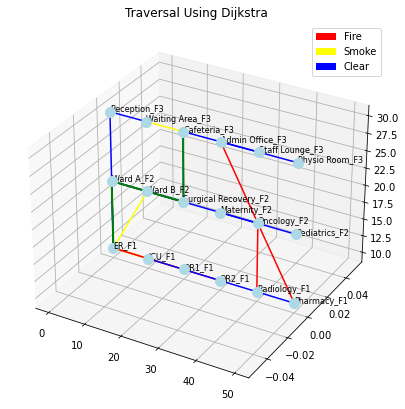

Exception in thread Thread-97:
Traceback (most recent call last):
  File "c:\Users\sampa\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "c:\Users\sampa\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\sampa\AppData\Local\Temp/ipykernel_18500/4258291874.py", line 122, in update_paths
  File "C:\Users\sampa\AppData\Local\Temp/ipykernel_18500/4258291874.py", line 162, in visualize_3d
  File "c:\Users\sampa\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 10, in draw
    self.blit()
  File "c:\Users\sampa\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 13, in blit
    _backend_tk.blit(self._tkphoto, self.renderer.buffer_rgba(),
  File "c:\Users\sampa\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 113, in blit
    photoimage.tk.call(_blit_tcl_name, argsid)
RuntimeError: main thread is not in main loop


In [ ]:
#working with changes in the green path but no user input to modify the weights
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import random
import threading
import time

# Initialize 3D graph
G = nx.Graph()
floor_count = 3  # Number of floors

nodes = {
    1: ['ER', 'ICU', 'OR1', 'OR2', 'Radiology', 'Pharmacy'],
    2: ['Ward A', 'Ward B', 'Surgical Recovery', 'Maternity', 'Oncology', 'Pediatrics'],
    3: ['Reception', 'Waiting Area', 'Cafeteria', 'Admin Office', 'Staff Lounge', 'Physio Room']
}

positions = {}
z_offset = 10
for floor, floor_nodes in nodes.items():
    for i, node in enumerate(floor_nodes):
        G.add_node(f"{node}_F{floor}")
        positions[f"{node}_F{floor}"] = (i * 10, 0, floor * z_offset)

edges_with_weights = [
    # Floor 1 connections
    ('ER_F1', 'ICU_F1', 10),
    ('ER_F1', 'OR1_F1', 15),
    ('ER_F1', 'OR2_F1', 20),
    ('ICU_F1', 'Radiology_F1', 15),
    ('Radiology_F1', 'Pharmacy_F1', 10),
    
    # Floor 2 connections
    ('Ward A_F2', 'Ward B_F2', 10),
    ('Ward A_F2', 'Surgical Recovery_F2', 15),
    ('Ward B_F2', 'Oncology_F2', 10),
    ('Maternity_F2', 'Pediatrics_F2', 10),
    
    # Floor 3 connections
    ('Reception_F3', 'Waiting Area_F3', 10),
    ('Waiting Area_F3', 'Cafeteria_F3', 15),
    ('Admin Office_F3', 'Staff Lounge_F3', 10),
    ('Cafeteria_F3', 'Physio Room_F3', 15),
    
    # Inter-floor connections
    ('ER_F1', 'Ward A_F2', 20),
    ('ER_F1', 'Ward B_F2', 25),
    ('ER_F1', 'Reception_F3', 30),
    ('Radiology_F1', 'Oncology_F2', 20),
    ('Pharmacy_F1', 'Admin Office_F3', 25),
    ('Surgical Recovery_F2', 'Cafeteria_F3', 30)
]

# Add edges to the graph
G.add_weighted_edges_from(edges_with_weights)

# Mock sensor updates for fire/smoke
# Store original weights in the graph as an attribute
# Add edges with original weights stored as an attribute
for u, v, weight in edges_with_weights:
    G[u][v]['original_weight'] = weight
    G[u][v]['weight'] = weight  # Initialize current weight to original weight

def mock_sensor_update(graph):
    for u, v in graph.edges:
        hazard_level = random.random()
        if hazard_level < 0.2:  # Fire
            graph[u][v]['hazard'] = 'fire'
            graph[u][v]['weight'] = graph[u][v]['original_weight'] * 3  # Triple weight for fire
        elif hazard_level < 0.5:  # Smoke
            graph[u][v]['hazard'] = 'smoke'
            graph[u][v]['weight'] = graph[u][v]['original_weight'] * 2  # Double weight for smoke
        else:  # Clear
            graph[u][v]['hazard'] = 'clear'
            graph[u][v]['weight'] = graph[u][v]['original_weight']  # Reset weight to original


def update_paths(graph, source, target, canvas, ax, result_text):
    while True:
        mock_sensor_update(graph)

        # Initialize paths and distances
        d_path, d_distance = "No path found", None
        a_path, a_distance = "No path found", None
        bf_path, bf_distance = "No path found", None

        try:
            # Dijkstra's Algorithm
            d_path = nx.dijkstra_path(graph, source, target, weight='weight')
            d_distance = sum(graph[u][v]['weight'] for u, v in zip(d_path[:-1], d_path[1:]))
        except nx.NetworkXNoPath:
            pass

        try:
            # A* Algorithm
            a_path = nx.astar_path(graph, source, target, heuristic=lambda u, v: 1, weight='weight')
            a_distance = sum(graph[u][v]['weight'] for u, v in zip(a_path[:-1], a_path[1:]))
        except nx.NetworkXNoPath:
            pass

        try:
            # Bellman-Ford Algorithm
            bf_lengths, bf_paths = nx.single_source_bellman_ford(graph, source, weight='weight')
            bf_path = bf_paths.get(target, "No path found")
            if bf_path != "No path found":
                bf_distance = sum(graph[u][v]['weight'] for u, v in zip(bf_path[:-1], bf_path[1:]))
        except nx.NetworkXNoPath:
            pass

        # Update Results
        result_text.delete(1.0, tk.END)
        result_text.insert(tk.END, f"Dijkstra's Path: {d_path}, Distance: {d_distance if d_distance else 'N/A'}\n")
        result_text.insert(tk.END, f"A* Path: {a_path}, Distance: {a_distance if a_distance else 'N/A'}\n")
        result_text.insert(tk.END, f"Bellman-Ford Path: {bf_path}, Distance: {bf_distance if bf_distance else 'N/A'}\n")

        # Visualize updated graph and path
        visualize_3d(canvas, ax, graph, path=d_path, algorithm_name="Dijkstra")
        time.sleep(4)
        visualize_3d(canvas, ax, graph, path=a_path, algorithm_name="A*")
        time.sleep(4)
        visualize_3d(canvas, ax, graph, path=bf_path, algorithm_name="Bellman-Ford")
        time.sleep(4)
        time.sleep(5)  # Update every 5 seconds

# Visualize 3D graph
def visualize_3d(canvas, ax, graph, path=None, algorithm_name=""):
    ax.clear()
    pos = positions
    color_map = {'fire': 'red', 'smoke': 'yellow', 'clear': 'blue'}

    # Draw nodes
    for node, (x, y, z) in pos.items():
        ax.scatter(x, y, z, color='lightblue', s=100)
        ax.text(x, y, z, node, fontsize=8)

    # Draw edges
    for edge in graph.edges(data=True):
        x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
        y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
        z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
        color = color_map[edge[2].get('hazard', 'clear')]
        ax.plot(x_coords, y_coords, z_coords, color=color)

    # Highlight path
    if path and path != "No path found":
        for i in range(len(path) - 1):
            x_coords = [pos[path[i]][0], pos[path[i + 1]][0]]
            y_coords = [pos[path[i]][1], pos[path[i + 1]][1]]
            z_coords = [pos[path[i]][2], pos[path[i + 1]][2]]
            ax.plot(x_coords, y_coords, z_coords, color='green', linewidth=2)

    legend_elements = [
        Patch(facecolor='red', label='Fire'),
        Patch(facecolor='yellow', label='Smoke'),
        Patch(facecolor='blue', label='Clear')
    ]
    ax.legend(handles=legend_elements)
    ax.set_title(f"Traversal Using {algorithm_name}")
    canvas.draw()

# GUI for visualization
def run_gui():
    root = tk.Tk()
    root.title("Emergency Path Optimization")
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

    def handle_input():
        source = source_entry.get()
        target = target_entry.get()
        if not source or not target:
            result_label.config(text="Please enter valid source and destination nodes.")
            return
        
        result_text.delete(1.0, tk.END)

        update_thread = threading.Thread(target=update_paths, args=(G, source, target, canvas, ax, result_text))
        update_thread.start()

    tk.Label(root, text="Source:").pack()
    source_entry = tk.Entry(root)
    source_entry.pack()

    tk.Label(root, text="Destination:").pack()
    target_entry = tk.Entry(root)
    target_entry.pack()

    tk.Button(root, text="Find Path", command=handle_input).pack()
    result_label = tk.Label(root, text="")
    result_label.pack()

    result_text = tk.Text(root, height=10)
    result_text.pack()

    root.mainloop()

if __name__ == "__main__":
    run_gui()


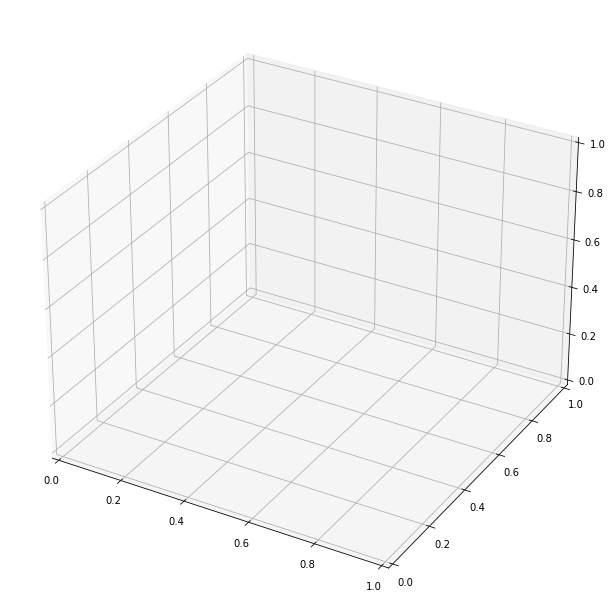

In [ ]:
#working in a good way maybe few changes and good to go
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import random
import threading
import time

# Initialize 3D graph
G = nx.Graph()
floor_count = 3  # Number of floors

nodes = {
    1: ['ER', 'ICU', 'OR1', 'OR2', 'Radiology', 'Pharmacy'],
    2: ['Ward A', 'Ward B', 'Surgical Recovery', 'Maternity', 'Oncology', 'Pediatrics'],
    3: ['Reception', 'Waiting Area', 'Cafeteria', 'Admin Office', 'Staff Lounge', 'Physio Room']
}

positions = {}
z_offset = 10
for floor, floor_nodes in nodes.items():
    for i, node in enumerate(floor_nodes):
        G.add_node(f"{node}_F{floor}")
        positions[f"{node}_F{floor}"] = (i * 10, 0, floor * z_offset)

edges_with_weights = [
    # Floor 1 connections
    ('ER_F1', 'ICU_F1', 10),
    ('ER_F1', 'OR1_F1', 15),
    ('ER_F1', 'OR2_F1', 20),
    ('ICU_F1', 'Radiology_F1', 15),
    ('Radiology_F1', 'Pharmacy_F1', 10),
    
    # Floor 2 connections
    ('Ward A_F2', 'Ward B_F2', 10),
    ('Ward A_F2', 'Surgical Recovery_F2', 15),
    ('Ward B_F2', 'Oncology_F2', 10),
    ('Maternity_F2', 'Pediatrics_F2', 10),
    
    # Floor 3 connections
    ('Reception_F3', 'Waiting Area_F3', 10),
    ('Waiting Area_F3', 'Cafeteria_F3', 15),
    ('Admin Office_F3', 'Staff Lounge_F3', 10),
    ('Cafeteria_F3', 'Physio Room_F3', 15),
    
    # Inter-floor connections
    ('ER_F1', 'Ward A_F2', 20),
    ('ER_F1', 'Ward B_F2', 25),
    ('ER_F1', 'Reception_F3', 30),
    ('Radiology_F1', 'Oncology_F2', 20),
    ('Pharmacy_F1', 'Admin Office_F3', 25),
    ('Surgical Recovery_F2', 'Cafeteria_F3', 30)
]

# Add edges to the graph
G.add_weighted_edges_from(edges_with_weights)

# Mock sensor updates for fire/smoke
# Store original weights in the graph as an attribute
# Add edges with original weights stored as an attribute
for u, v, weight in edges_with_weights:
    G[u][v]['original_weight'] = weight
    G[u][v]['weight'] = weight  # Initialize current weight to original weight

def mock_sensor_update(graph):
    for u, v in graph.edges:
        hazard_level = random.random()
        if hazard_level < 0.2:  # Fire
            graph[u][v]['hazard'] = 'fire'
            graph[u][v]['weight'] = graph[u][v]['original_weight'] * 3  # Triple weight for fire
        elif hazard_level < 0.5:  # Smoke
            graph[u][v]['hazard'] = 'smoke'
            graph[u][v]['weight'] = graph[u][v]['original_weight'] * 2  # Double weight for smoke
        else:  # Clear
            graph[u][v]['hazard'] = 'clear'
            graph[u][v]['weight'] = graph[u][v]['original_weight']  # Reset weight to original


def update_paths(graph, source, target, canvas, ax, result_text):
    while True:
        mock_sensor_update(graph)

        # Initialize paths and distances
        d_path, d_distance = "No path found", None
        a_path, a_distance = "No path found", None
        bf_path, bf_distance = "No path found", None

        try:
            # Dijkstra's Algorithm
            d_path = nx.dijkstra_path(graph, source, target, weight='weight')
            d_distance = sum(graph[u][v]['weight'] for u, v in zip(d_path[:-1], d_path[1:]))
        except nx.NetworkXNoPath:
            pass

        try:
            # A* Algorithm
            a_path = nx.astar_path(graph, source, target, heuristic=lambda u, v: 1, weight='weight')
            a_distance = sum(graph[u][v]['weight'] for u, v in zip(a_path[:-1], a_path[1:]))
        except nx.NetworkXNoPath:
            pass

        try:
            # Bellman-Ford Algorithm
            bf_lengths, bf_paths = nx.single_source_bellman_ford(graph, source, weight='weight')
            bf_path = bf_paths.get(target, "No path found")
            if bf_path != "No path found":
                bf_distance = sum(graph[u][v]['weight'] for u, v in zip(bf_path[:-1], bf_path[1:]))
        except nx.NetworkXNoPath:
            pass

        # Update Results
        result_text.delete(1.0, tk.END)
        result_text.insert(tk.END, f"Dijkstra's Path: {d_path}, Distance: {d_distance if d_distance else 'N/A'}\n")
        result_text.insert(tk.END, f"A* Path: {a_path}, Distance: {a_distance if a_distance else 'N/A'}\n")
        result_text.insert(tk.END, f"Bellman-Ford Path: {bf_path}, Distance: {bf_distance if bf_distance else 'N/A'}\n")

        # Visualize updated graph and path
        visualize_3d(canvas, ax, graph, path=d_path, algorithm_name="Dijkstra")
        time.sleep(4)
        visualize_3d(canvas, ax, graph, path=a_path, algorithm_name="A*")
        time.sleep(4)
        visualize_3d(canvas, ax, graph, path=bf_path, algorithm_name="Bellman-Ford")
        time.sleep(4)
        time.sleep(5)  # Update every 5 seconds

# Visualize 3D graph
def visualize_3d(canvas, ax, graph, path=None, algorithm_name=""):
    ax.clear()
    pos = positions
    color_map = {'fire': 'red', 'smoke': 'yellow', 'clear': 'blue'}

    # Draw nodes
    for node, (x, y, z) in pos.items():
        ax.scatter(x, y, z, color='lightblue', s=100)
        ax.text(x, y, z, node, fontsize=8)

    # Draw edges
    for edge in graph.edges(data=True):
        x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
        y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
        z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
        color = color_map[edge[2].get('hazard', 'clear')]
        ax.plot(x_coords, y_coords, z_coords, color=color)

    # Highlight path
    if path and path != "No path found":
        for i in range(len(path) - 1):
            x_coords = [pos[path[i]][0], pos[path[i + 1]][0]]
            y_coords = [pos[path[i]][1], pos[path[i + 1]][1]]
            z_coords = [pos[path[i]][2], pos[path[i + 1]][2]]
            ax.plot(x_coords, y_coords, z_coords, color='green', linewidth=2)

    legend_elements = [
        Patch(facecolor='red', label='Fire'),
        Patch(facecolor='yellow', label='Smoke'),
        Patch(facecolor='blue', label='Clear')
    ]
    ax.legend(handles=legend_elements)
    ax.set_title(f"Traversal Using {algorithm_name}")
    canvas.draw()

# Function to update edge weight based on user input
def update_edge_weight(graph, src, dest, new_weight):
    try:
        if (src, dest) in graph.edges or (dest, src) in graph.edges:
            graph[src][dest]['weight'] = new_weight
            graph[src][dest]['original_weight'] = new_weight  # Update original weight
            graph[src][dest]['hazard'] = 'clear'  # Reset hazard status
            return f"Weight updated for edge ({src}, {dest}) to {new_weight}."
        else:
            return "Error: Edge does not exist in the graph."
    except Exception as e:
        return f"Error: {str(e)}"

# Extend GUI for user-defined weight updates
def run_gui():
    root = tk.Tk()
    root.title("Emergency Path Optimization")

    # Main canvas for the graph visualization
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

    # Left-side controls for user interaction
    controls_frame = tk.Frame(root)
    controls_frame.pack(side=tk.RIGHT, fill=tk.Y, padx=10, pady=10)

    # Source and Destination Input
    tk.Label(controls_frame, text="Source:").pack()
    source_entry = tk.Entry(controls_frame)
    source_entry.pack()

    tk.Label(controls_frame, text="Destination:").pack()
    target_entry = tk.Entry(controls_frame)
    target_entry.pack()

    tk.Button(controls_frame, text="Find Path", command=lambda: handle_input()).pack()
    result_label = tk.Label(controls_frame, text="")
    result_label.pack()

    result_text = tk.Text(controls_frame, height=10)
    result_text.pack()

    # Update Weights Section
    tk.Label(controls_frame, text="Update Edge Weight").pack(pady=(20, 0))  # Add spacing for separation

    tk.Label(controls_frame, text="Source Node:").pack()
    weight_src_entry = tk.Entry(controls_frame)
    weight_src_entry.pack()

    tk.Label(controls_frame, text="Destination Node:").pack()
    weight_dest_entry = tk.Entry(controls_frame)
    weight_dest_entry.pack()

    tk.Label(controls_frame, text="New Weight:").pack()
    weight_entry = tk.Entry(controls_frame)
    weight_entry.pack()

    tk.Button(controls_frame, text="Update Weight", command=lambda: handle_weight_update()).pack()
    weight_update_label = tk.Label(controls_frame, text="")
    weight_update_label.pack()

    # Define the input handling function
    def handle_input():
        source = source_entry.get()
        target = target_entry.get()
        if not source or not target:
            result_label.config(text="Please enter valid source and destination nodes.")
            return

        result_text.delete(1.0, tk.END)

        update_thread = threading.Thread(
            target=update_paths,
            args=(G, source, target, canvas, ax, result_text),
        )
        update_thread.start()

    # Define the weight update handling function
    def handle_weight_update():
        src = weight_src_entry.get()
        dest = weight_dest_entry.get()
        try:
            new_weight = float(weight_entry.get())
        except ValueError:
            weight_update_label.config(text="Error: Weight must be a number.")
            return

        result = update_edge_weight(G, src, dest, new_weight)
        weight_update_label.config(text=result)

    root.mainloop()
if __name__ == "__main__":
    run_gui()


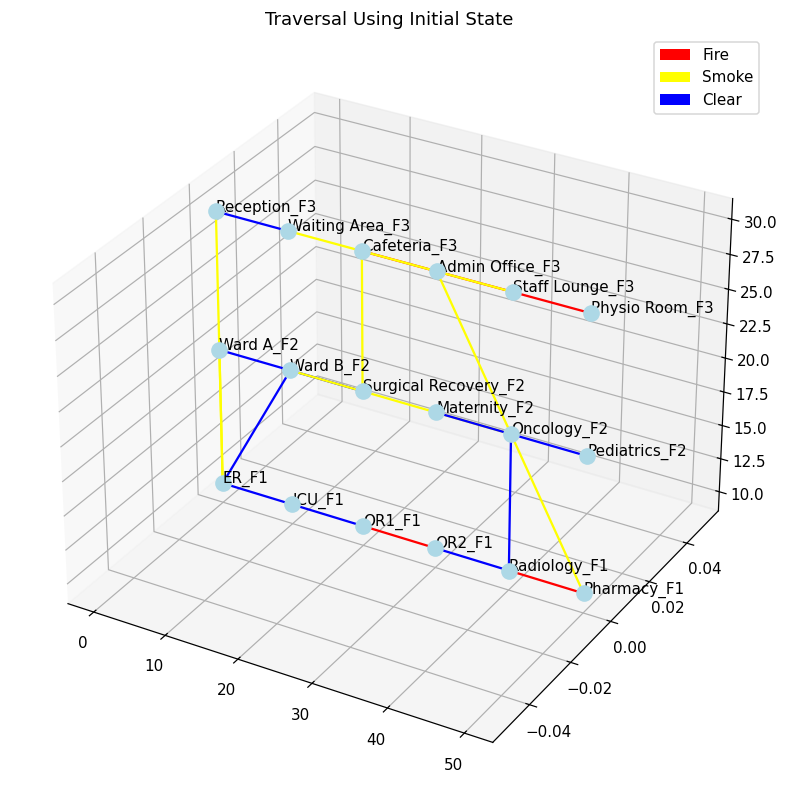

In [ ]:
#100% working
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import random
import threading
import time

# Initialize 3D graph
G = nx.Graph()
floor_count = 3  # Number of floors

nodes = {
    1: ['ER', 'ICU', 'OR1', 'OR2', 'Radiology', 'Pharmacy'],
    2: ['Ward A', 'Ward B', 'Surgical Recovery', 'Maternity', 'Oncology', 'Pediatrics'],
    3: ['Reception', 'Waiting Area', 'Cafeteria', 'Admin Office', 'Staff Lounge', 'Physio Room']
}

positions = {}
z_offset = 10
for floor, floor_nodes in nodes.items():
    for i, node in enumerate(floor_nodes):
        G.add_node(f"{node}_F{floor}")
        positions[f"{node}_F{floor}"] = (i * 10, 0, floor * z_offset)

edges_with_weights = [
    # Floor 1 connections
    ('ER_F1', 'ICU_F1', 10),
    ('ICU_F1', 'OR1_F1', 15),
    ('OR1_F1', 'OR2_F1', 20),
    ('OR2_F1', 'Radiology_F1', 15),
    ('Radiology_F1', 'Pharmacy_F1', 10),
    
    # Floor 2 connections
    ('Ward A_F2', 'Ward B_F2', 10),
    ('Ward B_F2', 'Surgical Recovery_F2', 15),
    ('Ward B_F2', 'Oncology_F2', 10),
    ('Maternity_F2', 'Pediatrics_F2', 10),
    
    # Floor 3 connections
    ('Reception_F3', 'Waiting Area_F3', 10),
    ('Waiting Area_F3', 'Cafeteria_F3', 15),
    ('Admin Office_F3', 'Staff Lounge_F3', 10),
    ('Cafeteria_F3', 'Physio Room_F3', 15),
    ('Cafeteria_F3', 'Admin Office_F3', 15),
    
    # Inter-floor connections
    ('ER_F1', 'Ward A_F2', 20),
    ('ER_F1', 'Ward B_F2', 25),
    ('ER_F1', 'Reception_F3', 30),
    ('Radiology_F1', 'Oncology_F2', 20),
    ('Pharmacy_F1', 'Admin Office_F3', 25),
    ('Surgical Recovery_F2', 'Cafeteria_F3', 30)
]

# Add edges to the graph
G.add_weighted_edges_from(edges_with_weights)

# Mock sensor updates for fire/smoke
# Store original weights in the graph as an attribute
# Add edges with original weights stored as an attribute
for u, v, weight in edges_with_weights:
    G[u][v]['original_weight'] = weight
    G[u][v]['weight'] = weight  # Initialize current weight to original weight

def mock_sensor_update(graph):
    for u, v in graph.edges:
        hazard_level = random.random()
        if hazard_level < 0.2:  # Fire
            graph[u][v]['hazard'] = 'fire'
            graph[u][v]['weight'] = graph[u][v]['original_weight'] * 3  # Triple weight for fire
        elif hazard_level < 0.5:  # Smoke
            graph[u][v]['hazard'] = 'smoke'
            graph[u][v]['weight'] = graph[u][v]['original_weight'] * 2  # Double weight for smoke
        else:  # Clear
            graph[u][v]['hazard'] = 'clear'
            graph[u][v]['weight'] = graph[u][v]['original_weight']  # Reset weight to original

def update_paths(graph, source, target, canvas, ax, result_text):
    while True:
        mock_sensor_update(graph)

        # Initialize paths and distances
        d_path, d_distance = "No path found", None
        a_path, a_distance = "No path found", None
        bf_path, bf_distance = "No path found", None

        try:
            # Dijkstra's Algorithm - prioritize clear paths
            d_path = nx.dijkstra_path(graph, source, target, weight='weight')
            d_distance = sum(graph[u][v]['weight'] for u, v in zip(d_path[:-1], d_path[1:]))
        except nx.NetworkXNoPath:
            pass

        try:
            # A* Algorithm - prioritize clear paths
            a_path = nx.astar_path(graph, source, target, heuristic=lambda u, v: 1, weight='weight')
            a_distance = sum(graph[u][v]['weight'] for u, v in zip(a_path[:-1], a_path[1:]))
        except nx.NetworkXNoPath:
            pass

        try:
            # Bellman-Ford Algorithm - prioritize clear paths
            bf_lengths, bf_paths = nx.single_source_bellman_ford(graph, source, weight='weight')
            bf_path = bf_paths.get(target, "No path found")
            if bf_path != "No path found":
                bf_distance = sum(graph[u][v]['weight'] for u, v in zip(bf_path[:-1], bf_path[1:]))
        except nx.NetworkXNoPath:
            pass

        # Update Results
        result_text.delete(1.0, tk.END)
        result_text.insert(tk.END, f"Dijkstra's Path: {d_path}, Distance: {d_distance if d_distance else 'N/A'}\n")
        result_text.insert(tk.END, f"A* Path: {a_path}, Distance: {a_distance if a_distance else 'N/A'}\n")
        result_text.insert(tk.END, f"Bellman-Ford Path: {bf_path}, Distance: {bf_distance if bf_distance else 'N/A'}\n")

        # Visualize updated graph and path
        visualize_3d(canvas, ax, graph, path=d_path, algorithm_name="Dijkstra")
        time.sleep(4)
        visualize_3d(canvas, ax, graph, path=a_path, algorithm_name="A*")
        time.sleep(4)
        visualize_3d(canvas, ax, graph, path=bf_path, algorithm_name="Bellman-Ford")
        time.sleep(5)  # Update every 5 seconds

# Visualize 3D graph
def visualize_3d(canvas, ax, graph, path=None, algorithm_name=""):
    ax.clear()
    pos = positions
    color_map = {'fire': 'red', 'smoke': 'yellow', 'clear': 'blue'}

    # Draw nodes
    for node, (x, y, z) in pos.items():
        ax.scatter(x, y, z, color='lightblue', s=100)
        ax.text(x, y, z, node, fontsize=10)

    # Draw edges
    for edge in graph.edges(data=True):
        x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
        y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
        z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
        color = color_map[edge[2].get('hazard', 'clear')]
        ax.plot(x_coords, y_coords, z_coords, color=color)

    # Highlight path
    if path and path != "No path found":
        for i in range(len(path) - 1):
            x_coords = [pos[path[i]][0], pos[path[i + 1]][0]]
            y_coords = [pos[path[i]][1], pos[path[i + 1]][1]]
            z_coords = [pos[path[i]][2], pos[path[i + 1]][2]]
            ax.plot(x_coords, y_coords, z_coords, color='green', linewidth=2)

    legend_elements = [
        Patch(facecolor='red', label='Fire'),
        Patch(facecolor='yellow', label='Smoke'),
        Patch(facecolor='blue', label='Clear')
    ]
    ax.legend(handles=legend_elements)
    ax.set_title(f"Traversal Using {algorithm_name}")
    canvas.draw()

# Function to update edge weight based on user input
def update_edge_weight(graph, src, dest, new_weight):
    try:
        if (src, dest) in graph.edges or (dest, src) in graph.edges:
            graph[src][dest]['weight'] = new_weight
            graph[src][dest]['original_weight'] = new_weight  # Update original weight
            graph[src][dest]['hazard'] = 'clear'  # Reset hazard status
            return f"Weight updated for edge ({src}, {dest}) to {new_weight}."
        else:
            return "Error: Edge does not exist in the graph."
    except Exception as e:
        return f"Error: {str(e)}"

def run_gui():
    root = tk.Tk()
    root.title("Hospital Emergency Evacuation System")
    root.geometry("1200x700")  # Set a fixed window size

    # Styling
    header_font = ("Arial", 16, "bold")
    label_font = ("Arial", 12)
    button_font = ("Arial", 11, "bold")
    text_bg_color = "#f0f8ff"  # Light blue background for text widgets
    button_color = "#4CAF50"  # Green
    button_text_color = "white"

    # Main canvas for the graph visualization
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack(side=tk.LEFT, fill=tk.BOTH, expand=True, padx=10, pady=10)

    # Right-side controls for user interaction
    controls_frame = tk.Frame(root, bg="#e6f7ff")  # Light blue background
    controls_frame.pack(side=tk.RIGHT, fill=tk.Y, padx=10, pady=10)

    # Title
    tk.Label(
        controls_frame,
        text="Hospital Emergency Evacuation System",
        font=header_font,
        bg="#e6f7ff",
        fg="#003366",
    ).pack(pady=10)

    # Separator
    tk.Frame(controls_frame, height=2, bd=1, relief="sunken", bg="#003366").pack(
        fill="x", padx=5, pady=10
    )

    # Source and Destination Input
    tk.Label(controls_frame, text="Source:", font=label_font, bg="#e6f7ff").pack()
    source_entry = tk.Entry(controls_frame, font=label_font, width=25)
    source_entry.pack(pady=5)

    tk.Label(controls_frame, text="Destination:", font=label_font, bg="#e6f7ff").pack()
    target_entry = tk.Entry(controls_frame, font=label_font, width=25)
    target_entry.pack(pady=5)

    tk.Button(
        controls_frame,
        text="Find Path",
        font=button_font,
        bg=button_color,
        fg=button_text_color,
        command=lambda: handle_input(),
    ).pack(pady=10)

    result_label = tk.Label(
        controls_frame, text="", font=label_font, bg="#e6f7ff", fg="red"
    )
    result_label.pack()

    result_text = tk.Text(
        controls_frame, height=10, bg=text_bg_color, font=label_font, wrap="word"
    )
    result_text.pack(pady=10)

    # Separator
    tk.Frame(controls_frame, height=2, bd=1, relief="sunken", bg="#003366").pack(
        fill="x", padx=5, pady=10
    )

    # Update Weights Section
    tk.Label(
        controls_frame,
        text="Update Edge Weight",
        font=header_font,
        bg="#e6f7ff",
        fg="#003366",
    ).pack(pady=10)

    tk.Label(controls_frame, text="Source Node:", font=label_font, bg="#e6f7ff").pack()
    weight_src_entry = tk.Entry(controls_frame, font=label_font, width=25)
    weight_src_entry.pack(pady=5)

    tk.Label(
        controls_frame, text="Destination Node:", font=label_font, bg="#e6f7ff"
    ).pack()
    weight_dest_entry = tk.Entry(controls_frame, font=label_font, width=25)
    weight_dest_entry.pack(pady=5)

    tk.Label(controls_frame, text="New Weight:", font=label_font, bg="#e6f7ff").pack()
    weight_entry = tk.Entry(controls_frame, font=label_font, width=25)
    weight_entry.pack(pady=5)

    tk.Button(
        controls_frame,
        text="Update Weight",
        font=button_font,
        bg="#ff6600",
        fg=button_text_color,
        command=lambda: handle_weight_update(),
    ).pack(pady=10)

    weight_update_label = tk.Label(
        controls_frame, text="", font=label_font, bg="#e6f7ff", fg="green"
    )
    weight_update_label.pack()

    # Define the input handling function
        # Handle input for pathfinding
    def handle_input():
        source = source_entry.get().strip()
        target = target_entry.get().strip()
        if not source or not target:
            result_label.config(text="Please provide both source and destination.")
            return
        elif source not in G.nodes or target not in G.nodes:
            result_label.config(text="Invalid source or destination node.")
            return

        result_label.config(text="Finding paths...")

        # Start the pathfinding update thread
        threading.Thread(
            target=update_paths,
            args=(G, source, target, canvas, ax, result_text),
            daemon=True,
        ).start()

    # Handle weight updates
    def handle_weight_update():
        src = weight_src_entry.get().strip()
        dest = weight_dest_entry.get().strip()
        try:
            new_weight = float(weight_entry.get().strip())
        except ValueError:
            weight_update_label.config(text="Invalid weight value.")
            return

        if not src or not dest:
            weight_update_label.config(text="Please provide both source and destination.")
            return
        elif (src, dest) not in G.edges and (dest, src) not in G.edges:
            weight_update_label.config(text="Edge does not exist.")
            return

        message = update_edge_weight(G, src, dest, new_weight)
        weight_update_label.config(text=message)

        # Initialize a thread to simulate hazard updates
    threading.Thread(target=lambda: mock_sensor_update(G), daemon=True).start()

    # Visualize the initial graph
    visualize_3d(canvas, ax, G, algorithm_name="Initial State")

    # Start the GUI event loop
    root.mainloop()


    root.mainloop()


if __name__ == "__main__":
    run_gui()


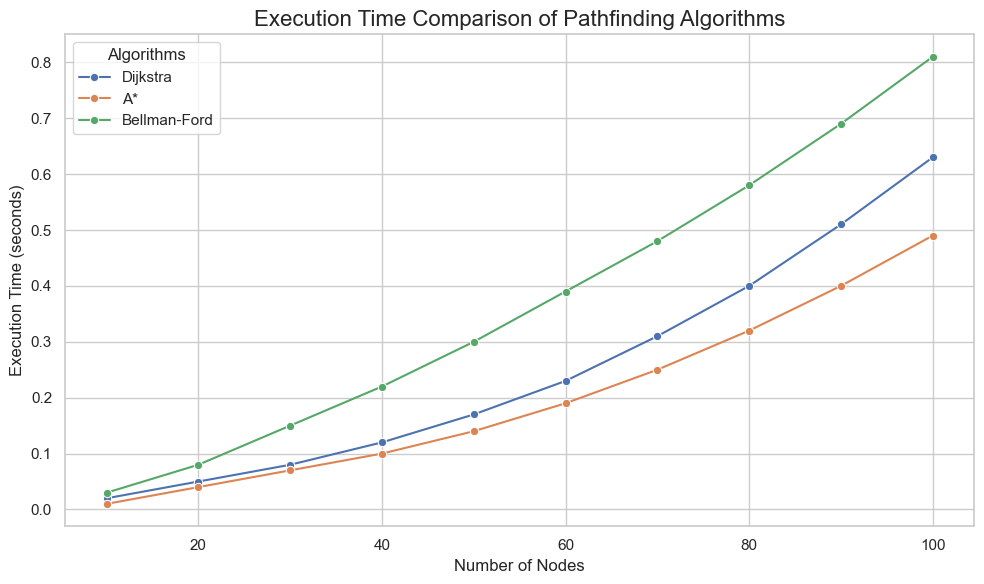

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Simulating execution times for different algorithms as the number of nodes increases
data = {
    "Nodes": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "Dijkstra": [0.02, 0.05, 0.08, 0.12, 0.17, 0.23, 0.31, 0.4, 0.51, 0.63],
    "A*": [0.01, 0.04, 0.07, 0.1, 0.14, 0.19, 0.25, 0.32, 0.4, 0.49],
    "Bellman-Ford": [0.03, 0.08, 0.15, 0.22, 0.3, 0.39, 0.48, 0.58, 0.69, 0.81]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the execution times of the three algorithms
sns.lineplot(x="Nodes", y="Dijkstra", data=df, label="Dijkstra", marker="o")
sns.lineplot(x="Nodes", y="A*", data=df, label="A*", marker="o")
sns.lineplot(x="Nodes", y="Bellman-Ford", data=df, label="Bellman-Ford", marker="o")

# Add labels and title
plt.title('Execution Time Comparison of Pathfinding Algorithms', fontsize=16)
plt.xlabel('Number of Nodes', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)
plt.legend(title='Algorithms')

# Show the plot
plt.tight_layout()
plt.show()


In [39]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(path_length_dijkstra, execution_time_dijkstra, label='Dijkstra', color='blue')
plt.scatter(path_length_astar, execution_time_astar, label='A*', color='orange')
plt.scatter(path_length_bf, execution_time_bf, label='Bellman-Ford', color='green')
plt.title('Execution Time vs Path Length')
plt.xlabel('Path Length (units)')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.show()




NameError: name 'path_length_dijkstra' is not defined

<Figure size 1000x600 with 0 Axes>

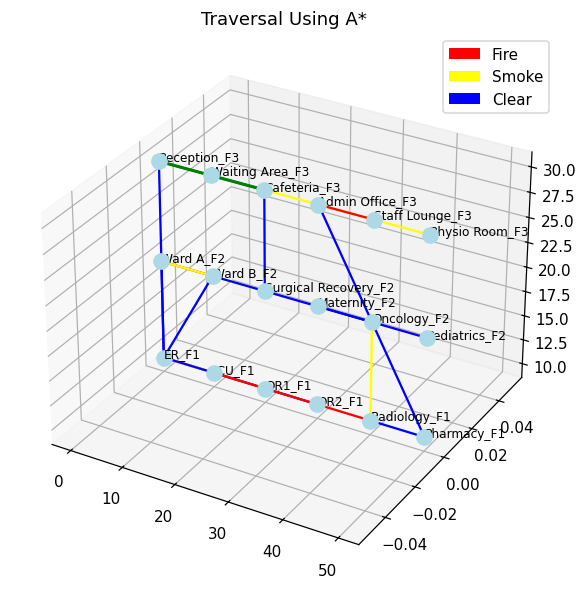

Exception in thread Thread-15 (update_paths):
Traceback (most recent call last):
  File "c:\Python311\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\kanap\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Python311\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\kanap\AppData\Local\Temp\ipykernel_8304\2811482258.py", line 124, in update_paths
  File "C:\Users\kanap\AppData\Local\Temp\ipykernel_8304\2811482258.py", line 161, in visualize_3d
  File "C:\Users\kanap\AppData\Roaming\Python\Python311\site-packages\matplotlib\backends\backend_tkagg.py", line 11, in draw
    self.blit()
  File "C:\Users\kanap\AppData\Roaming\Python\Python311\site-packages\matplotlib\backends\backend_tkagg.py", line 14, in blit
    _backend_tk.blit(self._tkphoto, self.renderer.buffer_rgba(),
  File "C:\Users\kanap\AppData\Roaming\Python\Py

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch
import tkinter as tk
from tkinter import ttk, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import random
import threading
import time

# Your existing graph setup code here...

# Function to initialize the styled GUI
def run_gui():
    root = tk.Tk()
    root.title("Emergency Path Optimization")
    root.geometry("1200x800")  # Set default window size
    root.configure(bg="#f2f2f2")  # Light background for a clean look

    # Main frame for layout
    main_frame = ttk.Frame(root, padding="10")
    main_frame.pack(fill=tk.BOTH, expand=True)

    # Add a title label
    title_label = ttk.Label(
        main_frame,
        text="Emergency Path Optimization System",
        font=("Helvetica", 16, "bold"),
        foreground="#004080",
        anchor="center",
    )
    title_label.pack(pady=10)

    # Graph visualization area
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    canvas = FigureCanvasTkAgg(fig, master=main_frame)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack(side=tk.LEFT, fill=tk.BOTH, expand=True, padx=10, pady=10)

    # Control panel
    control_panel = ttk.Frame(main_frame, padding="10", relief="raised")
    control_panel.pack(side=tk.RIGHT, fill=tk.Y, padx=10)

    # Add a styled frame for inputs
    input_frame = ttk.LabelFrame(
        control_panel, text="Path Finder", padding="10", relief="groove"
    )
    input_frame.pack(fill=tk.X, pady=10)

    ttk.Label(input_frame, text="Source:").pack(anchor=tk.W, pady=5)
    source_entry = ttk.Entry(input_frame, width=25)
    source_entry.pack(pady=5)

    ttk.Label(input_frame, text="Destination:").pack(anchor=tk.W, pady=5)
    target_entry = ttk.Entry(input_frame, width=25)
    target_entry.pack(pady=5)

    find_button = ttk.Button(
        input_frame,
        text="Find Path",
        style="TButton",
        command=lambda: handle_input(),
    )
    find_button.pack(pady=10)

    # Result display
    result_frame = ttk.LabelFrame(
        control_panel, text="Results", padding="10", relief="groove"
    )
    result_frame.pack(fill=tk.X, pady=10)

    result_text = tk.Text(
        result_frame,
        height=10,
        wrap=tk.WORD,
        font=("Courier", 10),
        bg="#e6f7ff",
    )
    result_text.pack(fill=tk.X, pady=5)

    # Update weights section
    update_frame = ttk.LabelFrame(
        control_panel, text="Update Edge Weight", padding="10", relief="groove"
    )
    update_frame.pack(fill=tk.X, pady=10)

    ttk.Label(update_frame, text="Source Node:").pack(anchor=tk.W, pady=5)
    weight_src_entry = ttk.Entry(update_frame, width=25)
    weight_src_entry.pack(pady=5)

    ttk.Label(update_frame, text="Destination Node:").pack(anchor=tk.W, pady=5)
    weight_dest_entry = ttk.Entry(update_frame, width=25)
    weight_dest_entry.pack(pady=5)

    ttk.Label(update_frame, text="New Weight:").pack(anchor=tk.W, pady=5)
    weight_entry = ttk.Entry(update_frame, width=25)
    weight_entry.pack(pady=5)

    update_button = ttk.Button(
        update_frame,
        text="Update Weight",
        command=lambda: handle_weight_update(),
    )
    update_button.pack(pady=10)

    weight_update_label = ttk.Label(update_frame, text="", foreground="#004080")
    weight_update_label.pack(pady=5)

    # Define the input handling function
    def handle_input():
        source = source_entry.get()
        target = target_entry.get()
        if not source or not target:
            messagebox.showerror(
                "Invalid Input", "Please enter valid source and destination nodes."
            )
            return

        result_text.delete(1.0, tk.END)
        threading.Thread(
            target=update_paths,
            args=(G, source, target, canvas, ax, result_text),
            daemon=True,
        ).start()

    # Define the weight update handling function
    def handle_weight_update():
        src = weight_src_entry.get()
        dest = weight_dest_entry.get()
        try:
            new_weight = float(weight_entry.get())
        except ValueError:
            messagebox.showerror("Invalid Input", "Weight must be a valid number.")
            return

        result = update_edge_weight(G, src, dest, new_weight)
        weight_update_label.config(text=result)

    # Configure modern ttk styles
    style = ttk.Style()
    style.theme_use("clam")  # Use a modern theme
    style.configure("TButton", font=("Helvetica", 10, "bold"), padding=5)
    style.configure("TLabel", font=("Helvetica", 10), background="#f2f2f2")

    root.mainloop()


if __name__ == "__main__":
    run_gui()
